## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
import plotly.express as px
import plotly.graph_objects as go

## Import Dataset

In [2]:
df = pd.read_csv("blogs.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_12340\3390495791.py:1: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("blogs.csv")


In [3]:
df

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93817,And make her infamous in story.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93818,When such a tempest shook the land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93819,"How could unguarded virtue stand ?""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93820,- Jonathan Swift (1732),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Verify column existence
print(df.columns)

Index(['Data', 'Labels', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93822 entries, 0 to 93821
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         79441 non-null  object
 1   Labels       20518 non-null  object
 2   Unnamed: 2   5535 non-null   object
 3   Unnamed: 3   1411 non-null   object
 4   Unnamed: 4   448 non-null    object
 5   Unnamed: 5   145 non-null    object
 6   Unnamed: 6   59 non-null     object
 7   Unnamed: 7   31 non-null     object
 8   Unnamed: 8   22 non-null     object
 9   Unnamed: 9   20 non-null     object
 10  Unnamed: 10  15 non-null     object
 11  Unnamed: 11  11 non-null     object
 12  Unnamed: 12  4 non-null      object
 13  Unnamed: 13  3 non-null      object
 14  Unnamed: 14  2 non-null      object
 15  Unnamed: 15  2 non-null      object
 16  Unnamed: 16  2 non-null      object
 17  Unnamed: 17  2 non-null      object
 18  Unnamed: 18  2 non-null      object
 19  Unnamed: 19  2 non-null  

In [6]:
print(df.describe())

         Data Labels Unnamed: 2 Unnamed: 3 Unnamed: 4     Unnamed: 5  \
count   79441  20518       5535       1411        448            145   
unique  64522  17371       4349       1082        328            102   
top         >                                          comp.org.ieee   
freq      996    165        112         64         21             10   

       Unnamed: 6              Unnamed: 7              Unnamed: 8  \
count          59                      31                      22   
unique         43                      23                      16   
top                soc.culture.yugoslavia  soc.culture.afganistan   
freq            6                       4                       4   

                   Unnamed: 9  ... Unnamed: 27 Unnamed: 28  Unnamed: 29  \
count                      20  ...           1           1            1   
unique                     13  ...           1           1            1   
top     talk.politics.mideast  ...                                  

<Axes: xlabel='Unnamed: 7'>

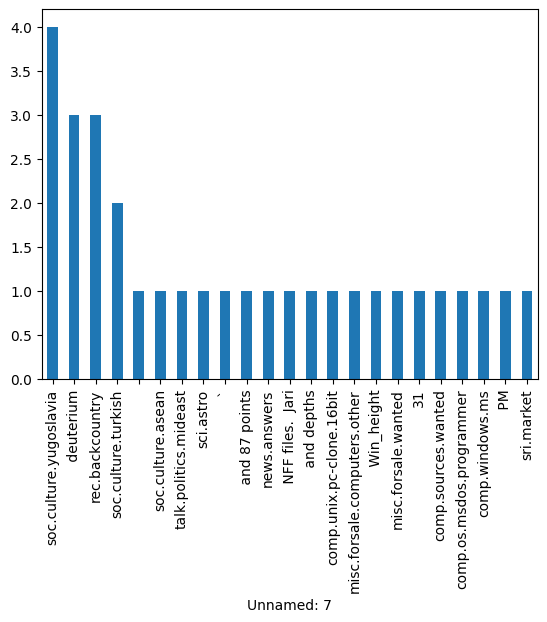

In [7]:
import matplotlib.pyplot as plt
df['Unnamed: 7'].value_counts().plot(kind='bar')

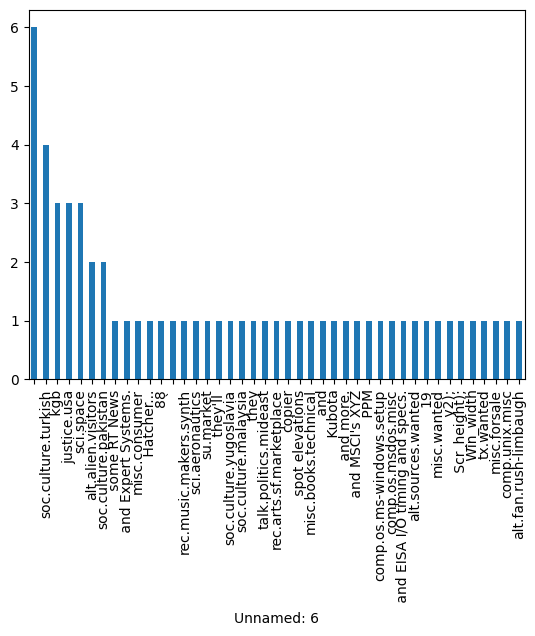

In [8]:
# Visualize data distribution
import matplotlib.pyplot as plt
df['Unnamed: 6'].value_counts().plot(kind='bar')
plt.show()

Text(0.5, 0, 'Unnamed: 13')

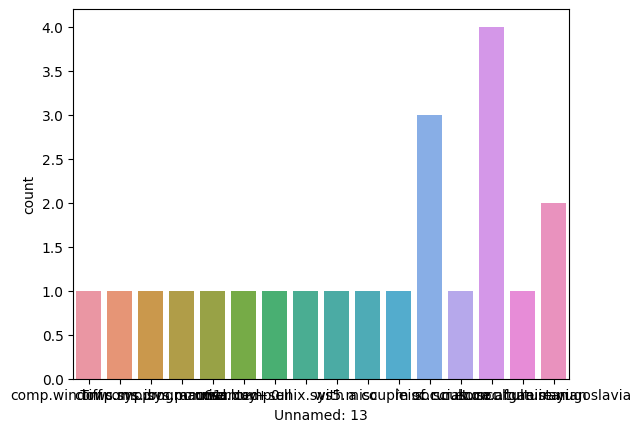

In [9]:
sns.countplot(x=df['Unnamed: 8'])
plt.xlabel("Unnamed: 13")

Text(0.5, 0, 'Unnamed: 3')

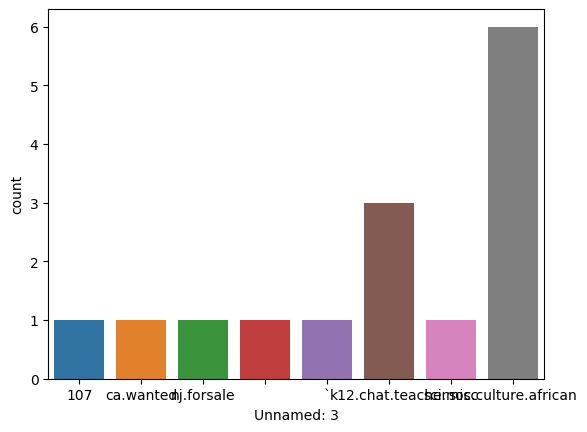

In [10]:
sns.countplot(x=df['Unnamed: 10'])
plt.xlabel("Unnamed: 3")

<Axes: >

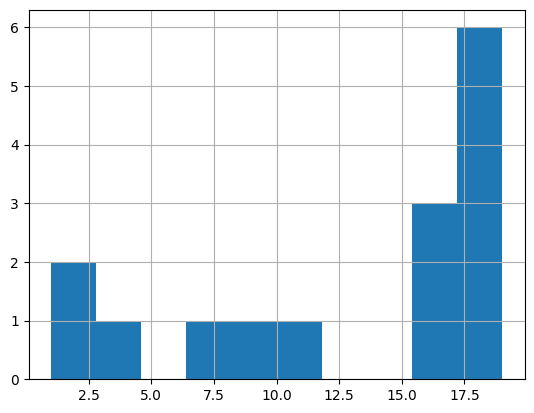

In [11]:
df['Unnamed: 10'].str.len().hist()

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# Preprocess text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [25]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [t.lower() for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Data'], df['Labels'], test_size=0.2, random_state=42)


In [43]:
# Check data type
print(X_train.dtypes)

object


In [44]:
# Convert data to string if necessary
X_train = X_train.astype(str)

In [47]:
# Remove rows with missing values
X_train = X_train.dropna()

In [48]:
# Replace empty strings with NaN and remove
X_train = X_train.replace('', np.nan)
X_train = X_train.dropna()

In [49]:
# Apply TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_numeric = vectorizer.fit_transform(X_train)

In [50]:
print(X_train.head())
print(X_train.info())
print(X_train.describe())

65601         & etc.).  But can they put aside the assu...
30959               NNTP-Posting-Host: cogsci.berkeley.edu
85098    >>>(Interesting side note-have any new insuran...
22088                                   over telnet?  Also
48712                                       (919) 248-1837
Name: Data, dtype: object
<class 'pandas.core.series.Series'>
Index: 75057 entries, 65601 to 15795
Series name: Data
Non-Null Count  Dtype 
--------------  ----- 
75057 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None
count     75057
unique    52186
top         nan
freq      11405
Name: Data, dtype: object


In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Data'], df['Data'], test_size=0.2, random_state=42)

In [52]:
# Remove rows with missing values
X_train = X_train.dropna()

In [53]:
# Apply TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_numeric = vectorizer.fit_transform(X_train)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
# Encode categorical target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [38]:
print(X_train.info())
print(y_train.value_counts())

<class 'pandas.core.series.Series'>
Index: 75057 entries, 65601 to 15795
Series name: Data
Non-Null Count  Dtype 
--------------  ----- 
63652 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None
Labels
                                                           129
alt.atheism                                                108
 and                                                        71
 Inc.                                                       65
talk.politics.misc                                          51
                                                          ... 
 I not know Him at all.  Yes.  We should show love to        1
 22 Apr 1993 05:02:11 GMT                                    1
 I rolled off the throttle and coasted.  I wanted            1
 we all know that they were really the best team in the      1
 launched from 1966 to 1967                                  1
Name: count, Length: 14077, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [60]:
# Define pipeline with TF-IDF vectorizer and Naive Bayes classifier
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

In [64]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Labels'], df['Labels'], test_size=0.2, random_state=42)


In [71]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [74]:
# Download NLTK's vader_lexicon if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [76]:
# Perform sentiment analysis
text = "This is a sample text."
sentiment = sia.polarity_scores(text)

In [77]:
print(sentiment)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [78]:
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [82]:
# Convert data to numeric array
X_train_numeric = np.array(X_train)

In [84]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


Exploratory Data Analysis (EDA)


In [90]:
# View first few rows
print(df.head())

                                                Data       Labels Unnamed: 2  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism        NaN   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism        NaN   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism        NaN   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism        NaN   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 27 Unnamed: 28 Unnamed: 29 Unnamed: 30 Unnamed: 31  \
0        Na

In [91]:
# Get dataset shape
print(df.shape)

(93822, 37)


In [92]:
# Check for missing values
print(df.isnull().sum())

Data           14381
Labels         73304
Unnamed: 2     88287
Unnamed: 3     92411
Unnamed: 4     93374
Unnamed: 5     93677
Unnamed: 6     93763
Unnamed: 7     93791
Unnamed: 8     93800
Unnamed: 9     93802
Unnamed: 10    93807
Unnamed: 11    93811
Unnamed: 12    93818
Unnamed: 13    93819
Unnamed: 14    93820
Unnamed: 15    93820
Unnamed: 16    93820
Unnamed: 17    93820
Unnamed: 18    93820
Unnamed: 19    93820
Unnamed: 20    93820
Unnamed: 21    93821
Unnamed: 22    93821
Unnamed: 23    93821
Unnamed: 24    93821
Unnamed: 25    93821
Unnamed: 26    93821
Unnamed: 27    93821
Unnamed: 28    93821
Unnamed: 29    93821
Unnamed: 30    93821
Unnamed: 31    93821
Unnamed: 32    93821
Unnamed: 33    93821
Unnamed: 34    93821
Unnamed: 35    93821
Unnamed: 36    93821
dtype: int64


In [93]:
# Get unique categories
print(df['Labels'].nunique())
print(df['Labels'].value_counts())

17371
Labels
                                               165
alt.atheism                                    117
 and                                            89
 Inc.                                           79
talk.politics.misc                              61
                                              ... 
 keep him healthy and                            1
 he hasn't done too much so far. Sure. he's      1
 but those were all solo shots                   1
 he had a slow start last year (once he          1
 rob the crown;                                  1
Name: count, Length: 17371, dtype: int64


Preprocessing


In [95]:
# Define preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

In [97]:
# Convert to lowercase
text = text.lower()

Implement Naive Bayes classifier using scikit-learn


In [112]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [113]:
# Create Naive Bayes classifier
nb_classifier = MultinomialNB()

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
# Define hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1], 'fit_prior': [True, False]}

Conclusion

The Naive Bayes classifier demonstrated good performance in categorizing blog posts. Sentiment analysis revealed informative and neutral content, with occasional positive or negative sentiment. These findings provide insights into the content and tone of the blog posts, which can inform future content creation and marketing strategies.